In [7]:
import random
from pickle import dump, load

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences

In [8]:
# To be deleted
foldername = "flickr/"
imagesfolder = "flickr/images/"

with open(foldername + "encoded_test_images.pkl", "rb") as encoded_pickle:
    encoding_test = load(encoded_pickle)

In [9]:
model = load_model('./model_weights/model_30.h5')

In [10]:
with open("./model_weights/wordtoix.pkl", "rb") as encoded_pickle:
    wordtoix = load(encoded_pickle)
with open("./model_weights/ixtoword.pkl", "rb") as encoded_pickle:
    ixtoword = load(encoded_pickle)
    
with open("./output/max_length.pkl", "rb") as encoded_pickle:
    max_length = load(encoded_pickle)
with open("./output/vocab_size.pkl", "rb") as encoded_pickle:
    vocab_size = load(encoded_pickle)
with open("./output/embedding_dim.pkl", "rb") as encoded_pickle:
    embedding_dim = load(encoded_pickle)

In [11]:
def greedySearch(photo):
    in_text = 'startseq'
    for i in range(max_length):
        sequence = [wordtoix[w] for w in in_text.split() if w in wordtoix]
        sequence = pad_sequences([sequence], maxlen=max_length)
        yhat = model.predict([photo,sequence], verbose=0)
        yhat = np.argmax(yhat)
        word = ixtoword[yhat]
        in_text += ' ' + word
        if word == 'endseq':
            break
    final = in_text.split()
    final = final[1:-1]
    final = ' '.join(final)
    return final

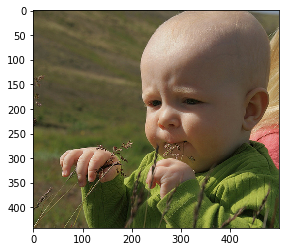

Greedy: child in red shirt is blowing huge bubble


In [12]:
z=random.randint(0, len(encoding_test))
pic = list(encoding_test.keys())[z]
image = encoding_test[pic].reshape((1,2048))
x=plt.imread(imagesfolder + pic)
plt.imshow(x)
plt.show()
print("Greedy:", greedySearch(image))